<a href="https://colab.research.google.com/github/DobiIsFree/gongboohater/blob/main/HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder model

- AE, DAE, CAE, VAE model

## Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

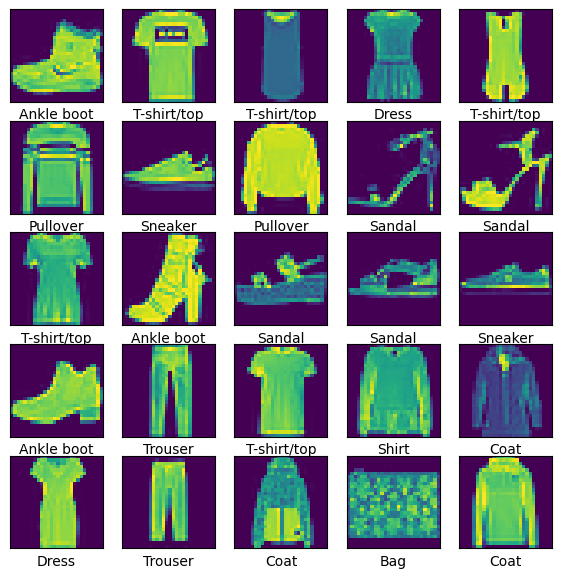

In [3]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [2]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

print(np.max(np.max(x_train_scaled)), np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)), np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


In [3]:
x_train_scaled = x_train_scaled.reshape(60000, 784)
x_test_scaled = x_test_scaled.reshape(10000, 784)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(60000, 784)
(10000, 784)


## DAE model


### Add noise (Salt and Pepper)

In [6]:
from imgaug import augmenters

noise = augmenters.SaltAndPepper(0.5)
seq_object = augmenters.Sequential([noise])

x_train_noisy = seq_object.augment_images(x_train_scaled * 255) / 255
x_test_noisy = seq_object.augment_images(x_test_scaled * 255) / 255

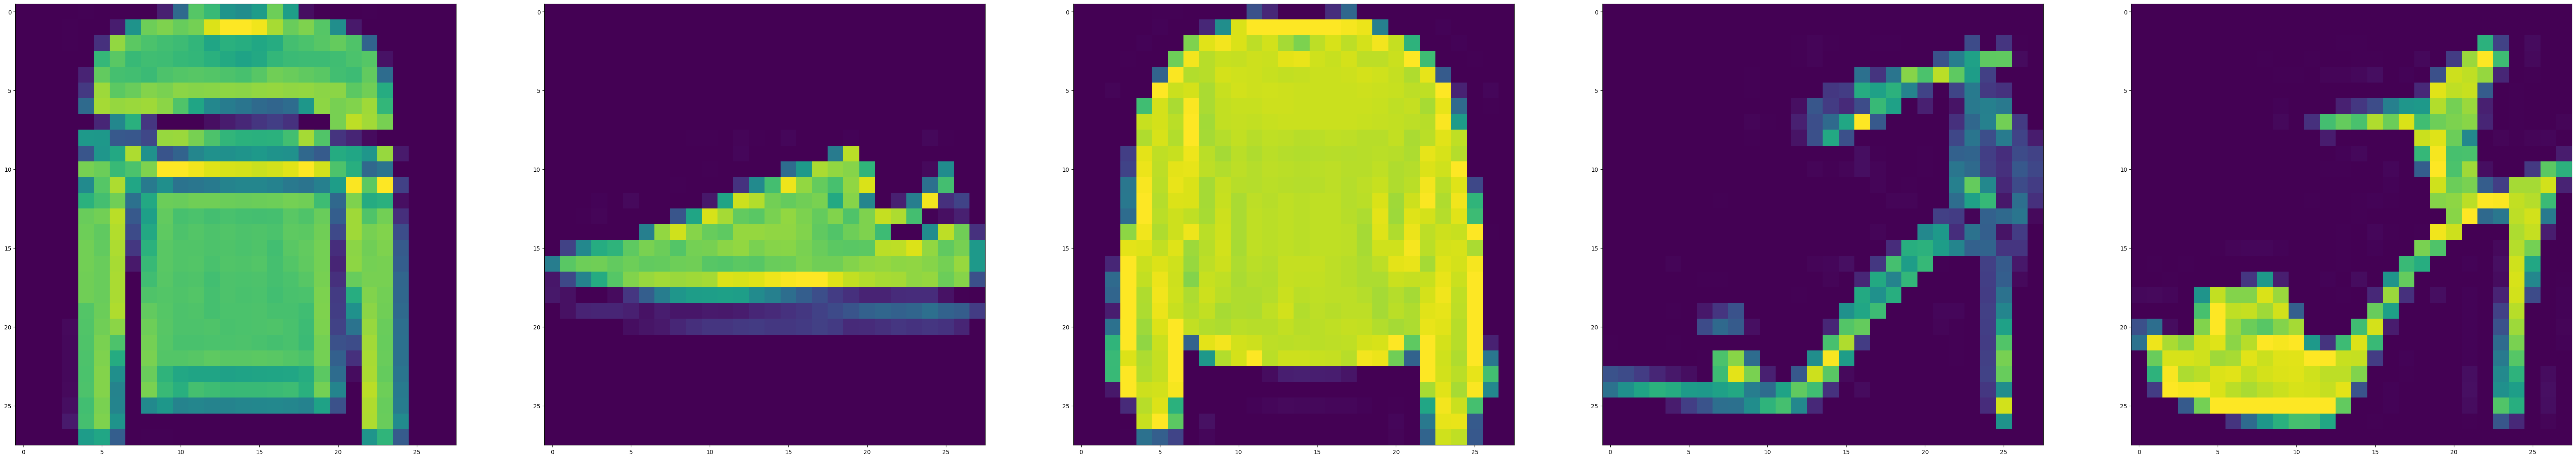

In [7]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
    ax[i-5].imshow(x_train[i].reshape(28,28))
plt.show()

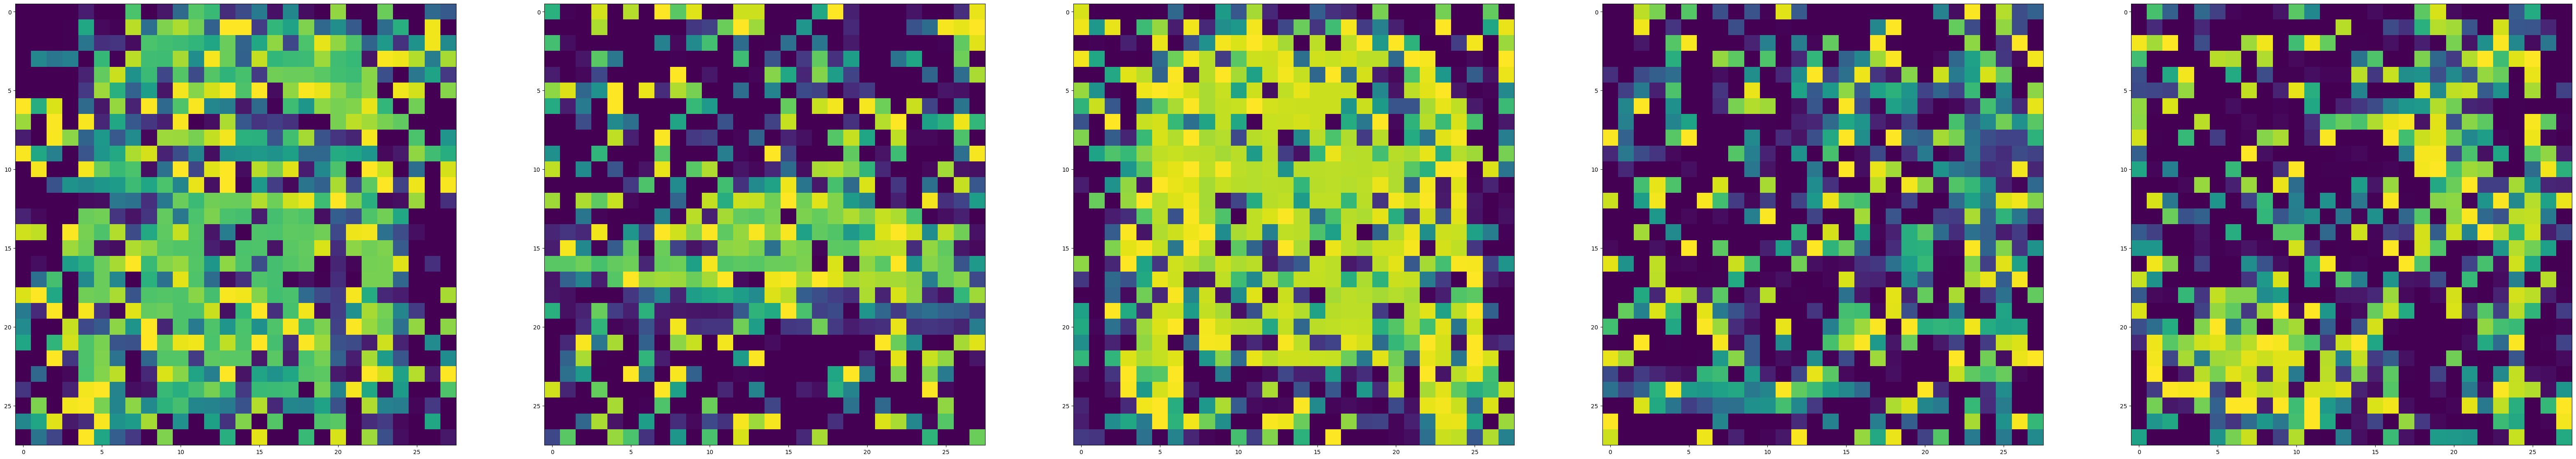

In [8]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
    ax[i-5].imshow(x_train_noisy[i].reshape(28,28))
plt.show()

### DAE model

In [9]:
from keras import layers, models

input_shape = (28 * 28, )

# encoding
input = layers.Input(input_shape)
encoder1 = layers.Dense(500, activation='relu')(input)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

latent_v = layers.Dense(30, activation='relu')(encoder3)

# decoding
decoder1 = layers.Dense(100, activation='relu')(latent_v)
decoder2 = layers.Dense(300, activation='relu')(decoder1)
decoder3 = layers.Dense(500, activation='relu')(decoder2)
output = layers.Dense(28*28, activation='relu')(decoder3)

DAE = models.Model(input, output)
DAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
DAE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 30)                3030      
                                                                 
 dense_4 (Dense)             (None, 100)               3100      
                                                                 
 dense_5 (Dense)             (None, 300)               30300 

In [10]:
history = DAE.fit(x_train_noisy, x_train_scaled, 
                  validation_data = [x_test_noisy, x_test_scaled], batch_size = 32, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 17s 5ms/step - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 7/20


### Generated data (Noise removed) 


1/1 [==============================] - 0s 114ms/step


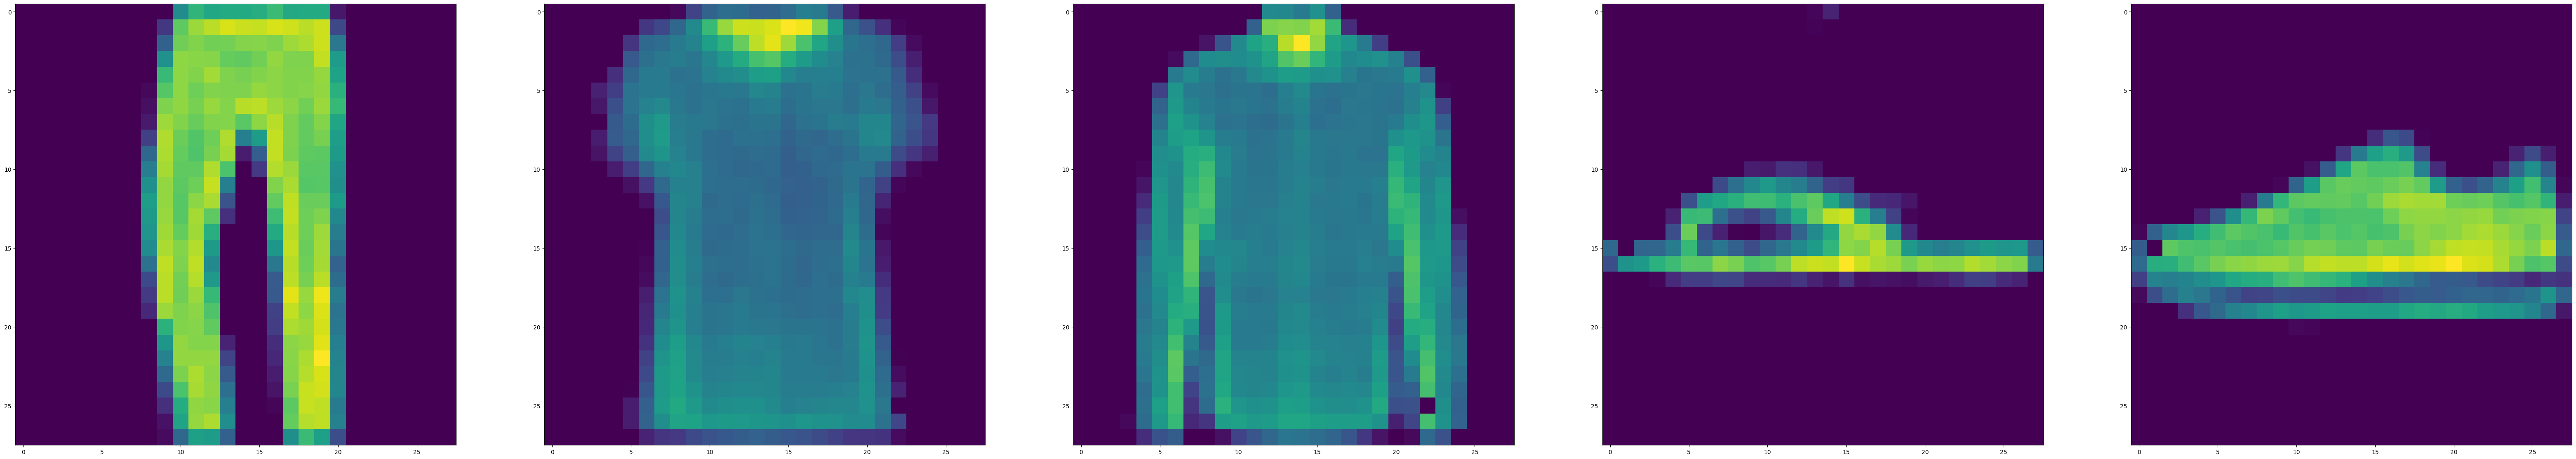

In [11]:
decoded_img = DAE.predict(x_test_noisy[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(decoded_img[i].reshape(28, 28))
plt.show()

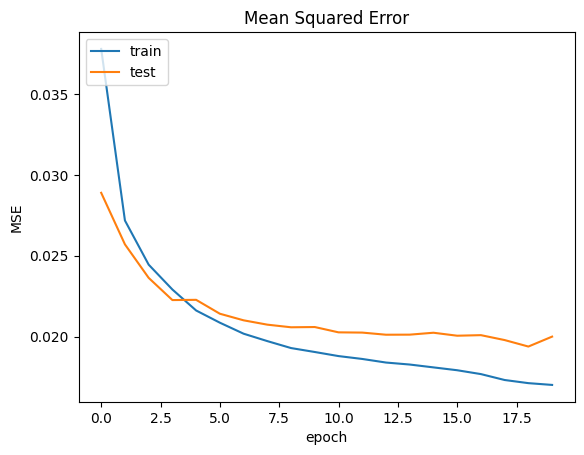

In [12]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CAE model

In [4]:
from keras import layers, models

x_train_scaled = x_train_scaled.reshape((-1, 28, 28, 1))
x_test_scaled = x_test_scaled.reshape((-1, 28, 28, 1))

input_shape = (28, 28, 1)

input = layers.Input(input_shape)
conv_enc1 = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input)
pooling_enc1 = layers.MaxPooling2D((2, 2))(conv_enc1)
conv_enc2 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(pooling_enc1)
pooling_enc2 = layers.MaxPooling2D((2, 2))(conv_enc2)
conv_enc3 = layers.Conv2D(16, (3,3), padding='same', activation='relu')(pooling_enc2)

flatten_enc = layers.Flatten()(conv_enc3)
dense_enc = layers.Dense(10, activation='relu')(flatten_enc)
dense_dec = layers.Dense(28*28, activation='relu')(dense_enc)

dense_dec = tf.reshape(dense_dec, (-1, 7, 7, 16))
deconv_dec1 = layers.Conv2DTranspose(32, (3,3), padding='same', activation='sigmoid')(dense_dec)
upsample_dec1 = layers.UpSampling2D()(deconv_dec1)
deconv_dec2 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='sigmoid')(upsample_dec1)
upsample_dec2 = layers.UpSampling2D()(deconv_dec2)
deconv_dec3 = layers.Conv2DTranspose(1, (3,3), padding='same', activation='sigmoid')(upsample_dec2)

output = deconv_dec3

In [5]:
CAE = models.Model(input, output)
CAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
CAE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624  

In [6]:
history = CAE.fit(x_train_scaled, x_train_scaled,
                  validation_data=[x_test_scaled, x_test_scaled], batch_size = 32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 22s 6ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 3/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 5/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 6/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoc

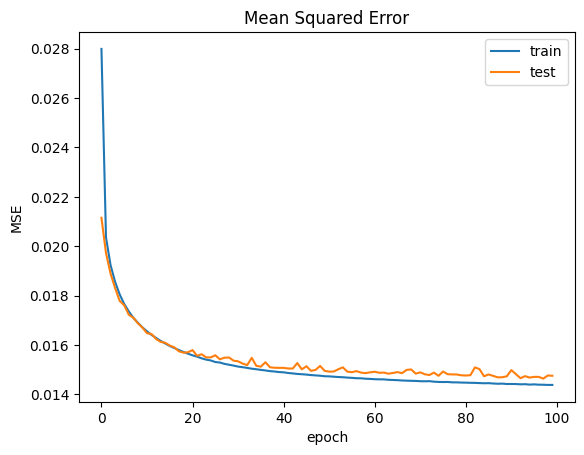

In [7]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 19ms/step


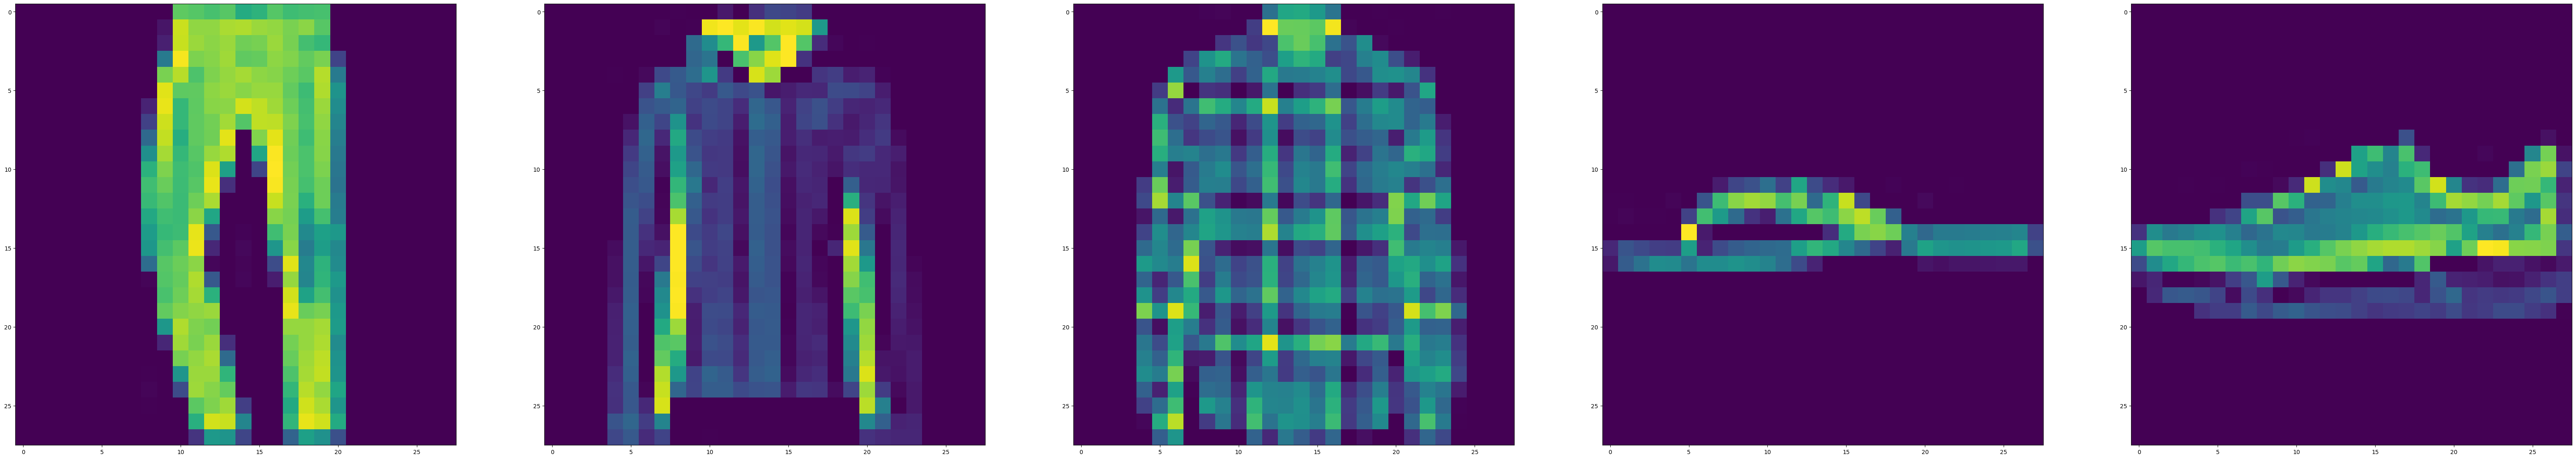

In [11]:
decoded_img = CAE.predict(x_test[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(x_test[i].reshape(28, 28))
plt.show()

1/1 [==============================] - 0s 27ms/step


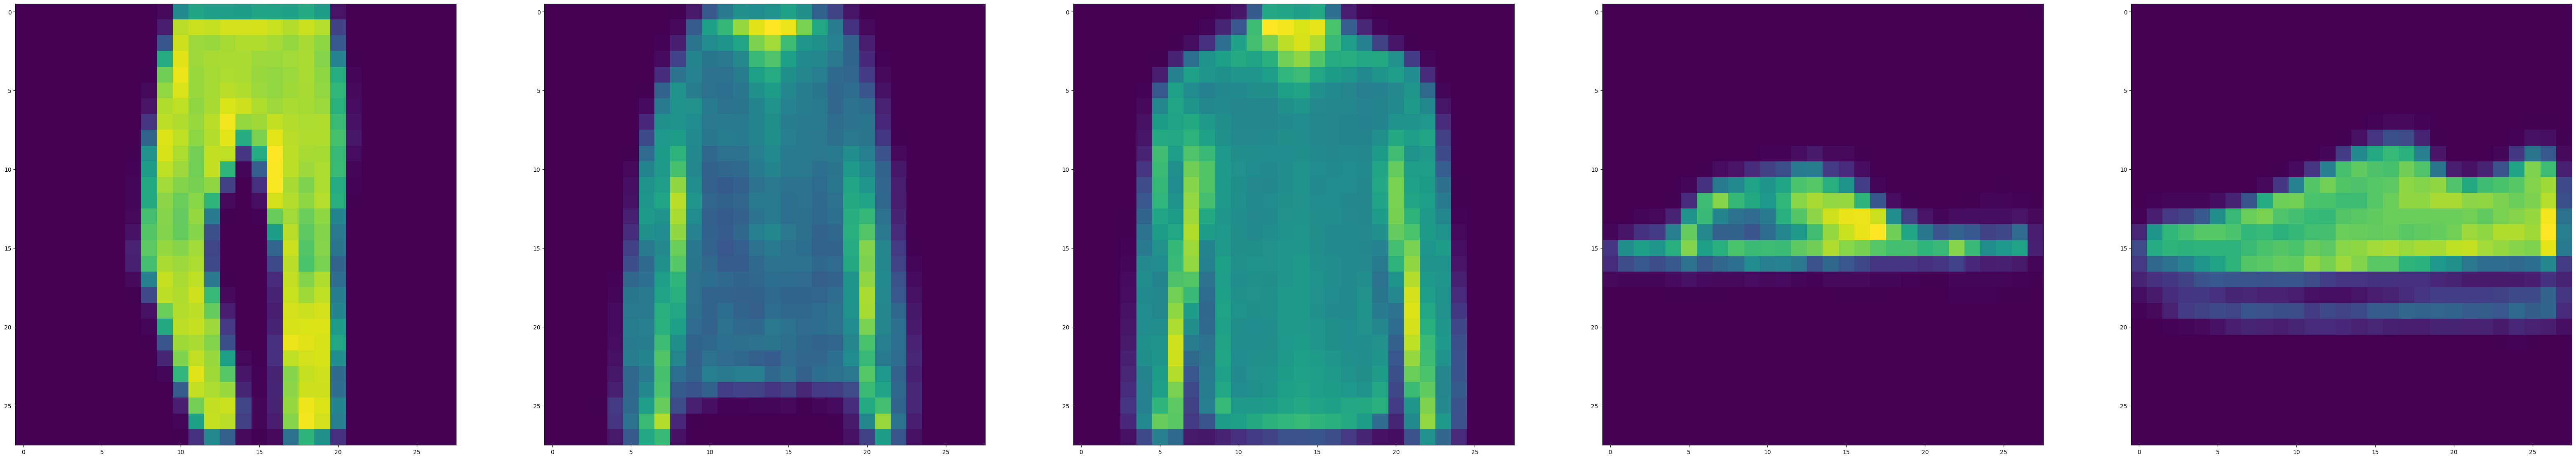

In [12]:
decoded_img = CAE.predict(x_test_scaled[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(decoded_img[i].reshape(28, 28))
plt.show()